<a href="https://www.kaggle.com/code/soumikniloy/twitter-hate-speech-recognition?scriptVersionId=134703299" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

 Load the dataset

In [2]:

data = pd.read_csv('/kaggle/input/twitter-hate-speech/train_E6oV3lV.csv')

In [3]:
# Extract the features (tweets) and labels (hate speech classes)
X = data['tweet']
y = data['label']

In [4]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [6]:
# Train the model
model = SVC(kernel='linear')
model.fit(X_train_vec, y_train)

SVC(kernel='linear')

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test_vec)

In [8]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9594869388393555


In [9]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[5905   32]
 [ 227  229]]


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

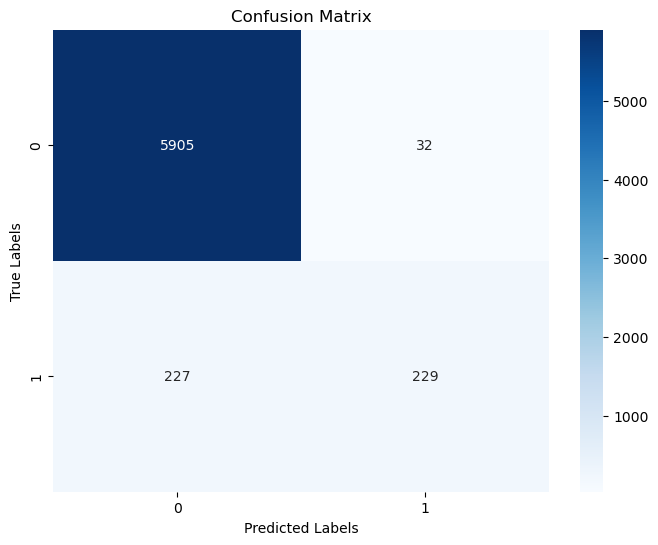

In [11]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [12]:
def predict_hate_speech(text):
    # Preprocess the input text
    # You may need to apply similar preprocessing steps as above
    
    # Vectorize the preprocessed text
    text_vectorized = vectorizer.transform([text])
    
    # Predict the class label
    prediction = model.predict(text_vectorized)[0]
    
    if prediction == 0:
        return "Not Hate Speech"
    else:
        return "Hate Speech"



In [13]:
# Example usage
input_text = "@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot"
result = predict_hate_speech(input_text)
print(result)

Hate Speech
